### Regresión Logística
La regresión logística es un tipo de algoritmo de clasificación, es un modelo estadístico y de ML utilizado principalmente para resolver problemas de clasificación binaria, es decir, predecir una variable objetivo que solo puede tomar dos valores. 

Usa la función logística (llamada sigmoide) para transformar una combinación lineal de las variables de entrada en un valor binario. Las variables dependientes deben ser continuas. La regresión logística se puede utilizar tanto para clasificación binaria como para clasificación multiclase.

![](img/sigmoide.png)

La regresión logística devuelve un puntaje de probabilidad entre 0 y 1 para una muestra de datos dada. De hecho, la regresión logística predice la probabilidad de esa muestra, y asignamos los casos a una clase discreta basada en esa probabilidad.

##### Práctica
Clasificar si una persona comprará un producto (1) o no (0) basado en:

- Edad
- Salario
- Tiempo en sitio web

In [2]:
# IMPORTAR

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8')

In [3]:
# CREAR DATOS FAKE

np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'edad': np.random.randint(18, 70, n),
    'salario': np.random.normal(50000, 15000, n),
    'tiempo_sitio': np.random.uniform(0, 120, n),
    'compro': np.random.binomial(1, 
              1 / (1 + np.exp(-(0.05*(np.random.normal(50000, 15000, n)) - 2))), n)  # Simulación realista
})

# Ajuste realista: más salario y menos edad → más probabilidad de compra
logit = -5 + 0.08 * data['salario']/1000 - 0.05 * data['edad'] + 0.03 * data['tiempo_sitio']
prob = 1 / (1 + np.exp(-logit))
data['compro'] = (np.random.random(n) < prob).astype(int)

print(data.head())
print("\nDistribución de compras:")
print(data['compro'].value_counts())

   edad       salario  tiempo_sitio  compro
0    56  25903.305196    119.560121       0
1    69  53051.954538     44.197144       0
2    46  38654.738821     53.833276       0
3    32  28666.194356     86.648513       0
4    60  40301.406736    106.343494       0

Distribución de compras:
compro
0    709
1    291
Name: count, dtype: int64


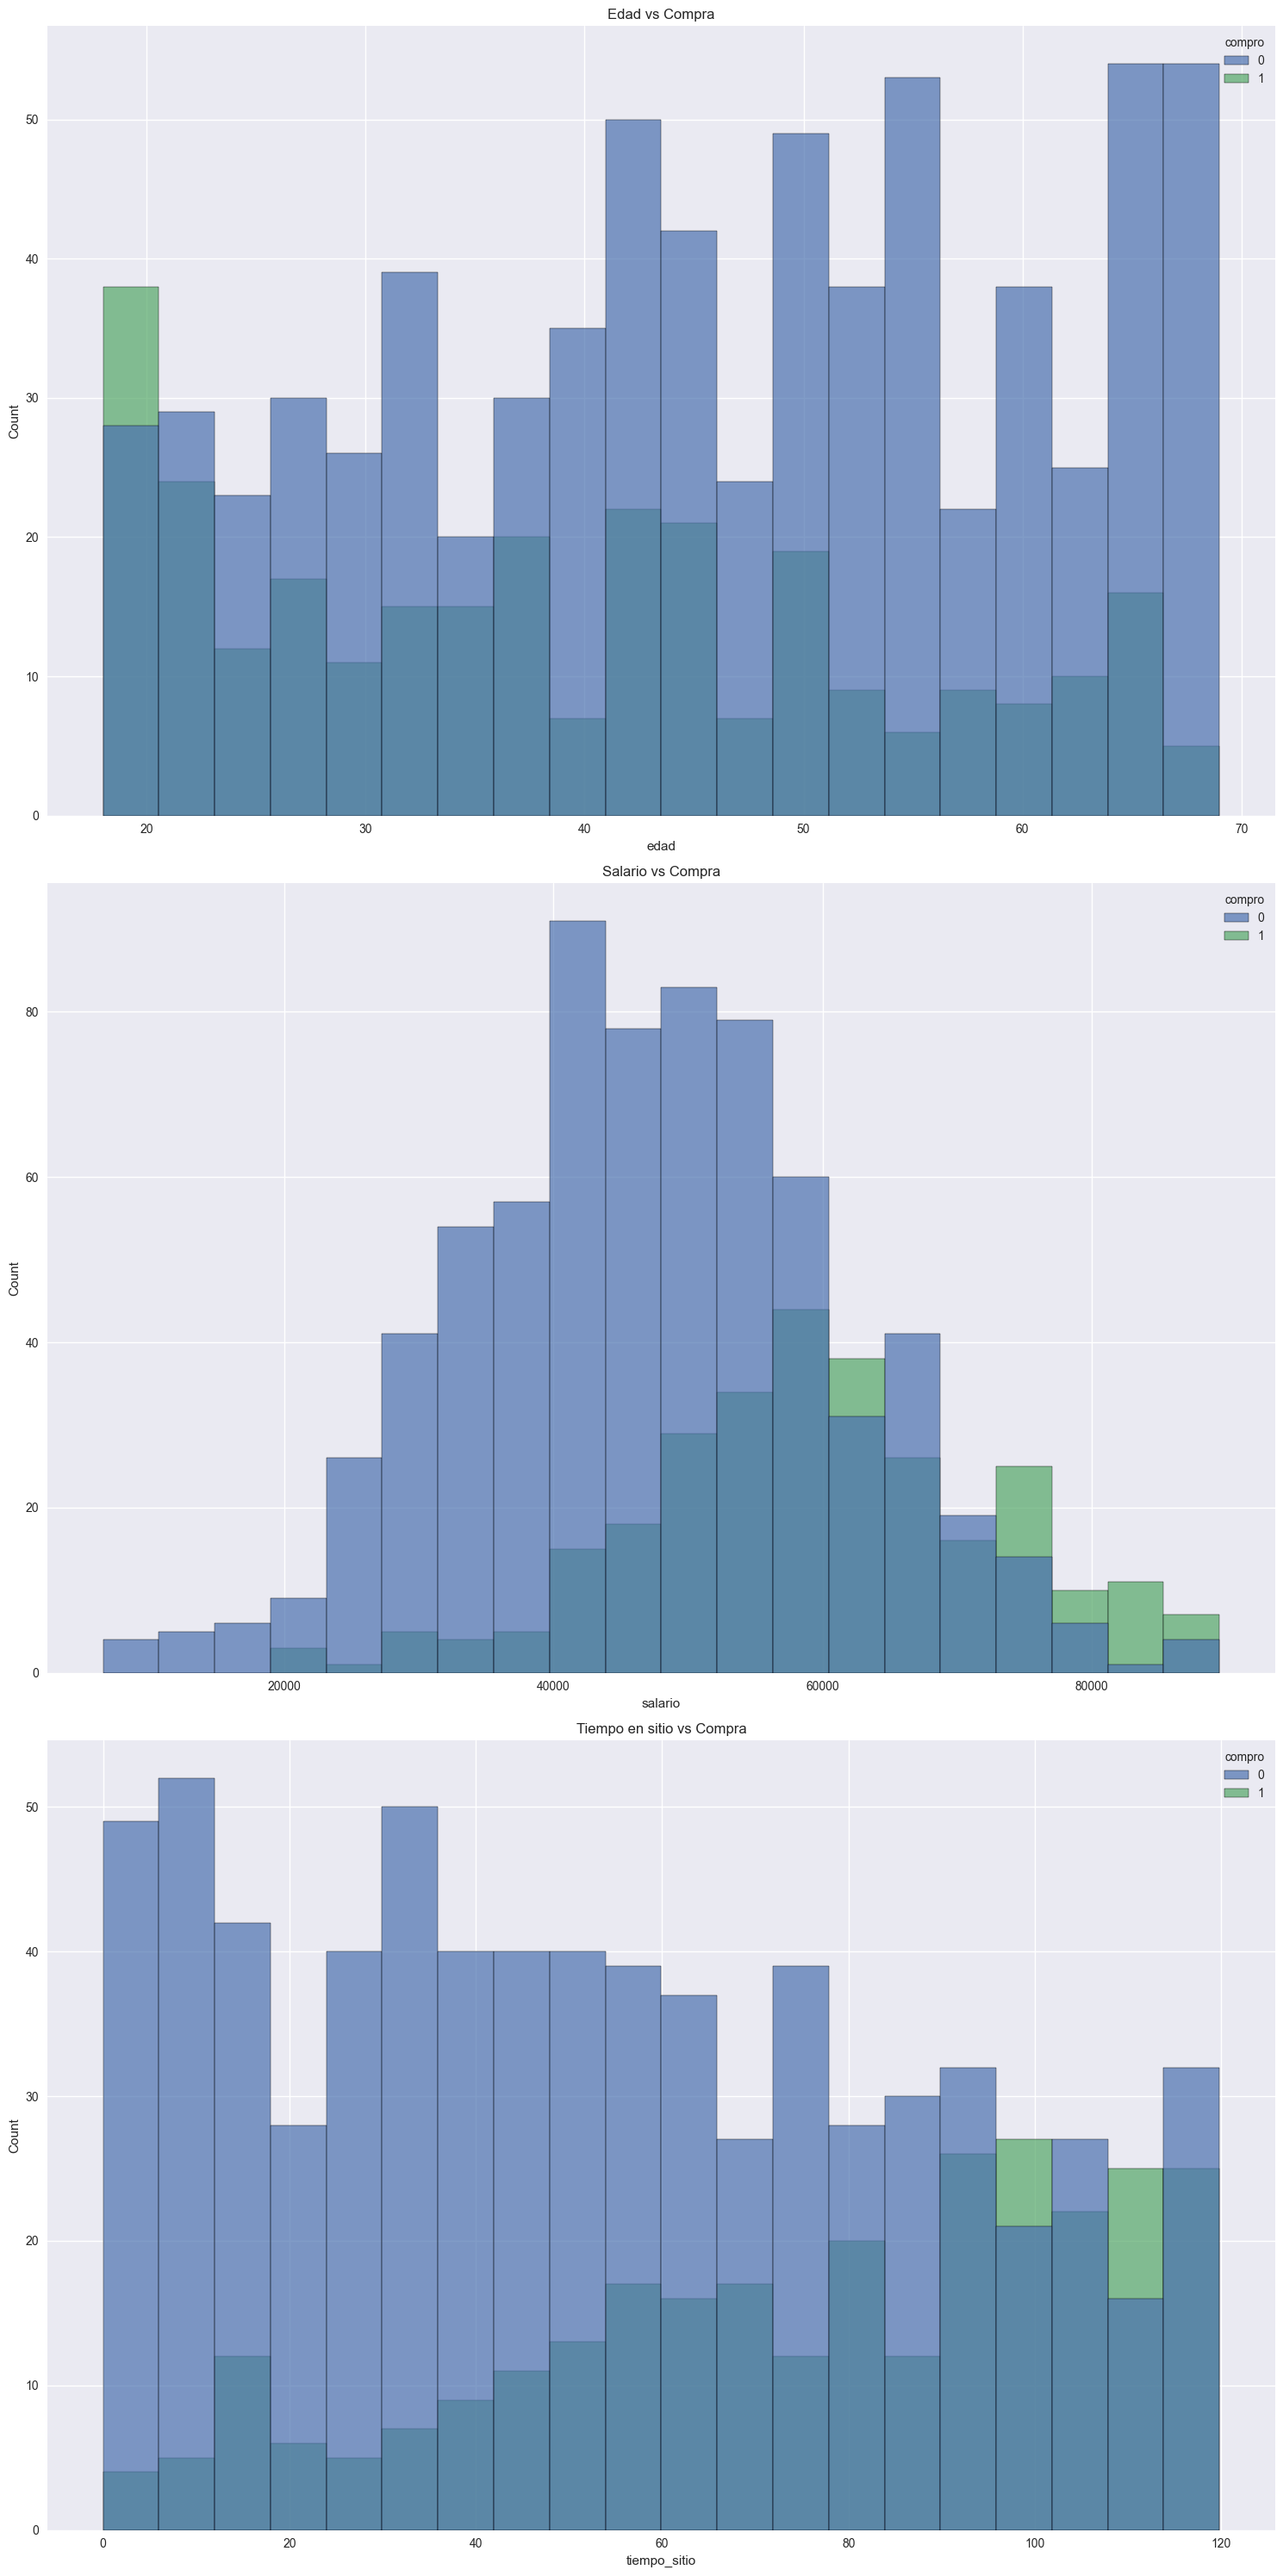

In [4]:
# VISUALIZACIÓN EXPLORATORIA

fig, axes = plt.subplots(3, 1, figsize=(15, 30))
sns.histplot(data=data, x='edad', hue='compro', ax=axes[0], bins=20, alpha=0.7)
sns.histplot(data=data, x='salario', hue='compro', ax=axes[1], bins=20, alpha=0.7)
sns.histplot(data=data, x='tiempo_sitio', hue='compro', ax=axes[2], bins=20, alpha=0.7)
axes[0].set_title("Edad vs Compra")
axes[1].set_title("Salario vs Compra")
axes[2].set_title("Tiempo en sitio vs Compra")
plt.tight_layout()
plt.show()

In [6]:
# PREPARAR DATOS DE ENTRENAMIENTO Y PRUEBAS

X = data[['edad', 'salario', 'tiempo_sitio']]
y = data['compro']

# Estandarizar (importante para regresión logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# ENTRENAMIENTO DEL MODELO

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado.")
print()
print("Coeficientes:")
print("-------------")
for var, coef in zip(['edad', 'salario', 'tiempo_sitio'], modelo.coef_[0]):
    print(f"  {var}: {coef:.4f}")
print()
print(f"Intercepto: {modelo.intercept_[0]:.4f}")
print()
print("Ni los coeficientes ni el intercepto son probabilidades ni porcentajes directos. Son valores en escala de log-odds.")

Modelo entrenado.

Coeficientes:
-------------
  edad: -0.7398
  salario: 1.2534
  tiempo_sitio: 0.9920

Intercepto: -1.3340

Ni los coeficientes ni el intercepto son probabilidades ni porcentajes directos. Son valores en escala de log-odds.


In [10]:
# PROBAR EL MODELO

y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1

=== MATRIZ DE CONFUSIÓN ===


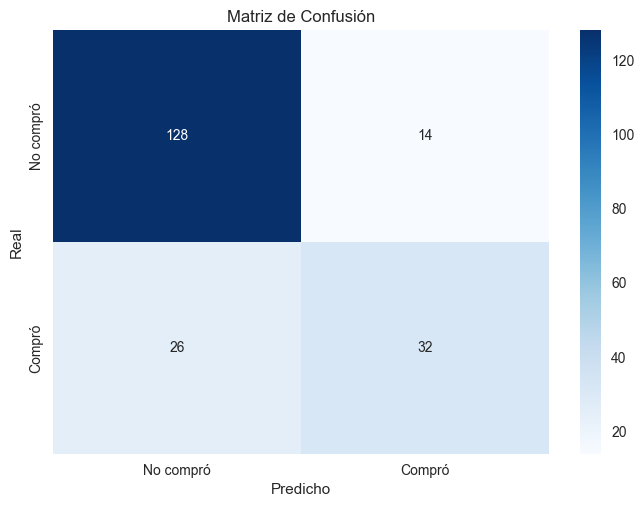


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

   No compró       0.83      0.90      0.86       142
      Compró       0.70      0.55      0.62        58

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200


AUC-ROC: 0.846


In [11]:
# EVALUAR EL MODELO EN BASE A LA PRUEBA

print("=== MATRIZ DE CONFUSIÓN ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No compró', 'Compró'], yticklabels=['No compró', 'Compró'])
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred, target_names=['No compró', 'Compró']))

print(f"\nAUC-ROC: {roc_auc_score(y_test, y_prob):.3f}")

![](img/metricas_logistica.png)

In [ ]:
# PREDEDIR SI COMPRA

nuevo_cliente = pd.DataFrame({
    'edad': [35],
    'salario': [60000],
    'tiempo_sitio': [45]
})

nuevo_scaled = scaler.transform(nuevo_cliente)
prob_compra = modelo.predict_proba(nuevo_scaled)[0, 1]
prediccion = modelo.predict(nuevo_scaled)[0]

print(f"\nNuevo cliente (35 años, $60k, 45 min en sitio):")
print(f"→ Probabilidad de compra: {prob_compra:.1%}")
print(f"→ Predicción: {'SÍ comprará' if prediccion == 1 else 'NO comprará'}")


Nuevo cliente (35 años, $60k, 45 min en sitio):
→ Probabilidad de compra: 36.8%
→ Predicción: NO comprará
